### SalesReinforcer Project

#### Background:
A technology company in the Education industry offers various services to customers ranging from startups, SMEs and enterprises to help them upskill. The company wants to develop a platform that the customers can use to benefit from the opportunities and services offered by the company. In line with this goal, the sales team is looking for ways to first understand the underlying patterns in their CRM data, second optimize the user acquisition pipeline to improve their company’s sales funnel with the ultimate goal to create the best user experience.

#### Data Description

The dataset from the company is anonymized to exclude identifying customer information, such as names, emails, etc. Each row in the dataset represents a potential customer. Attributes starting from “Id” to “Interested In” consist of each person’s demographic information, such as where they live, or what training they have. Starting with “Message State” to “Subscribed” indicates the steps or attributes for the user acquisition pipeline and illustrates the different steps of customers lifecycle, starting with the initial contact to a prospect to qualified leads, to finally subscribing and becoming a customer.

The dataset contains the following features
* `ID` Candidate ID, always Filled (Numeric)
* `Country` Candidate's demographic information, contains blanks
* `Education` Candidate's education level encoded from B1 to B30, contains blanks
* `First Contact` Date of First Contact, contains blanks
* `Last Contact` Date of Last Contact, contains blanks
* `Status` Categories of 1st message, 2nd message, 3rd message or blank
* `Stage` Categories of subscribed already, declined/canceled call, did not join the call, interested, not interested, do not contact or blank
* `First Call` Date of First Call, contains blanks
* `Signed up for a Demo` Date of When they signed up for Demo, contains blanks
* `Filled in Customer Survey` Date they filled customer Survey, contains blanks
* `Did Sign up to the Platform` Date Signed up to platform, contains blanks
* `Account Manager Assigned` Date Account Manager assigned, contains blanks
* `Subscribed` Date Subscribed, contains blanks


#### Goals:

The main goal of this project is to design and develop a Reinforcement Learning agent to optimize the user acquisition pipeline that would help us discover the optimal attributes/steps/actions to increase overall sales.


#### Initial setup

* Import all libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda\envs\tf\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load the dataset

In [2]:
df = pd.read_csv("SalesCRM - CRM.csv")

df.head()

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,NaN,NaN
1,2,Austria,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-04-25,2022-04-25,2022-04-25,NaN,NaN
2,3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-24,NaN,NaN,NaN,NaN
3,4,France,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04-20,2022-04-20,2022-04-22,2022-04-22,NaN
4,5,USA,NaN,NaN,NaN,NaN,NaN,2022-04-23,2022-04-19,2022-04-19,NaN,NaN,NaN


The columns with date information are converted into integer type. For the records without any data, we will replace it with 0 and use 1 to replace the records that have date information.

Similarly, the missing values for the categorical data are replaces with "Unknown" string to add uniformity

In [3]:
date_columns = [
    "First Contact", "Last Contact", "First Call", "Signed up for a demo",
    "Did sign up to the platform", "Filled in customer survey",
    "Account Manager assigned", "Subscribed"
]


for col in date_columns:
    df[col] = (~df[col].isna()).astype(int)
    
    
label_encoders = {}
categorical_columns = ['Country', 'Education', 'Status', 'Stage']
for col in categorical_columns:
    le = LabelEncoder()
    df[col].fillna("Unknown", inplace=True)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [4]:
decoded_df = df.copy()  # Create a copy of the dataframe to avoid modifying the original
for col in categorical_columns:
    decoded_df[col] = label_encoders[col].inverse_transform(decoded_df[col])

#### Exploratory Data Analysis (EDA)

In [5]:
decoded_df

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed
0,1,Unknown,Unknown,0,0,Unknown,Unknown,0,0,0,1,0,0
1,2,Austria,Unknown,0,0,Unknown,Unknown,1,1,1,1,0,0
2,3,United Arab Emirates,Unknown,0,0,Unknown,Unknown,0,1,0,0,0,0
3,4,France,Unknown,0,0,Unknown,Unknown,1,1,1,1,1,0
4,5,USA,Unknown,0,0,Unknown,Unknown,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027,11789,USA,Unknown,1,1,1st message,Unknown,0,0,0,0,0,0
11028,11790,USA,Unknown,1,1,1st message,Unknown,0,0,0,0,0,0
11029,11791,USA,Unknown,1,1,1st message,Unknown,0,0,0,0,0,0
11030,11792,USA,Unknown,1,1,1st message,Unknown,0,0,0,0,0,0


The following plots show the distribution of candidates who have already subscribed to the program.

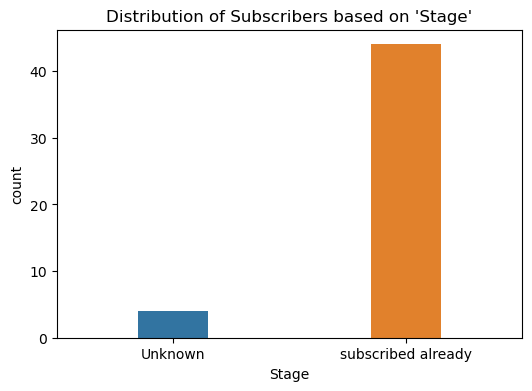

In [6]:
# Inspect distribution of 'Stage' for subscribers
plt.figure(figsize=(6, 4))
sns.countplot(data=decoded_df[decoded_df['Subscribed'] == 1], x='Stage', width=0.3)
plt.title("Distribution of Subscribers based on 'Stage'")
plt.show()

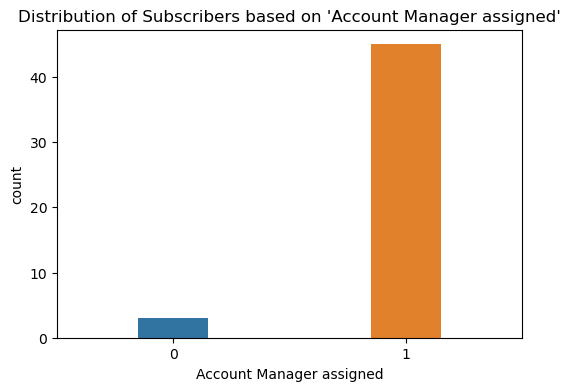

In [7]:
# Inspect distribution of 'Account Manager assigned' for subscribers
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Subscribed'] == 1], x='Account Manager assigned', width=0.3)
plt.title("Distribution of Subscribers based on 'Account Manager assigned'")
plt.show()

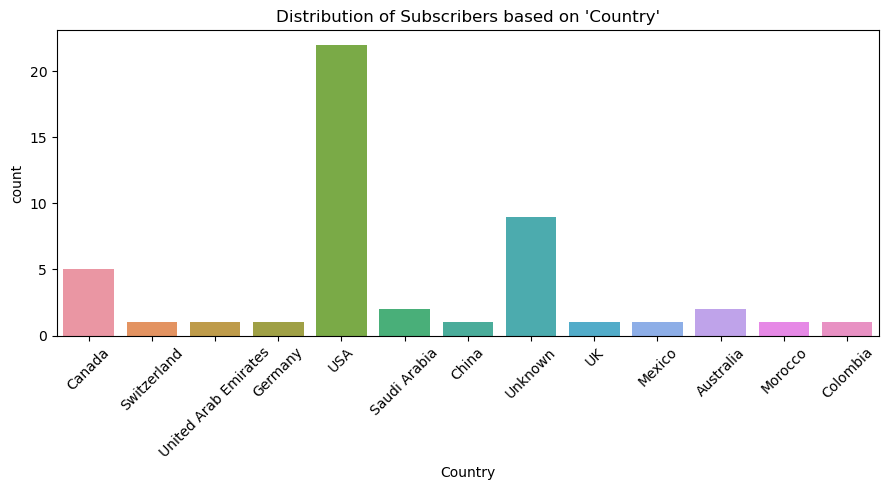

In [8]:
plt.figure(figsize=(9, 5))
sns.countplot(data=decoded_df[decoded_df['Subscribed'] == 1], x='Country')
plt.title("Distribution of Subscribers based on 'Country'")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Insights

We can derive the following insights from EDA
1. Already Subscribed or in the Unknown Stage: This is not very actionable in terms of already subscribed, it might help to further contact people in the Unknown stage to clarify their position.
2. Assigned an Account Manager: People who have been assigned an account manager are more likely to subscribe
3. Are from the U.S: While this is not a strong predictor, most of the customers who have subscribed are from US followed by those customers whose country information is missing.


#### Approach

#####  1. Data Preparation and Q-Network Setup

In this step, we will prepare the data and initialize a Q-network (q_network). We will initialize q_network as a MLPRegressor neural network with specified architecture and parameters. It servers as a approximator for estimating Q-values. The Q-network plays a crucial role in reinforcement learning, particularly in Q-learning, where it approximates the Q-values for state-action pairs. "initial_input" and "initial_target" are randomly generated data used for initial training of the Q-network. During training, the Q-network learns to approximate the Q-values, which represent the expected future rewards for each possible action in different states.

In [9]:
X = df.drop('Subscribed', axis=1)
y = df['Subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


q_network = MLPRegressor(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=5000, warm_start=True)
initial_input = np.random.randn(10, X_train.shape[1])
initial_target = np.random.randn(10, 7)
q_network.fit(initial_input, initial_target)

MLPRegressor(hidden_layer_sizes=(128,), max_iter=5000, warm_start=True)

##### 2. Define helper functions

In [10]:
# Action Mapping: defines a mapping of action indices to action names. 
# This mapping is used to interpret the agent's chosen actions.

action_mapping = {
    0: "make call",
    1: "contact",
    2: "demo",
    3: "survey",
    4: "assign manager",
    5: "subscribe",
    6: "do nothing"
}


def choose_action(state):
    """
    chooses an action for the agent based on the Q-network's predictions. 
    The agent can explore randomly with a probability determined by epsilon.
    """
    state_values = np.array([list(state.values())])
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(list(action_mapping.keys()))
    q_values = q_network.predict(state_values)
    return np.argmax(q_values)


def get_new_state(state, action):
    """
    computes the next state based on the current state and the chosen action. 
    It simulates how the state changes when taking a specific action.
    """
    new_state = state.copy()
    action_name = action_mapping[action]
    
    if new_state['Stage'] == 2 and (action_name == "make call" or action_name == "contact"):  # do not contact
        return new_state
    
    if action_name == "make call":
        new_state['First Call'] = 1
        if new_state['Stage'] < 3:  # If the stage is less than "interested", move to "interested"
            new_state['Stage'] = 3
    elif action_name == "contact":
        new_state['First Contact'] = 1
    elif action_name == "demo":
        new_state['Signed up for a demo'] = 1
    elif action_name == "survey":
        new_state['Filled in customer survey'] = 1
    elif action_name == "assign manager":
        new_state['Account Manager assigned'] = 1
    
    return new_state


# Rewards: For every action, the agent will get a positive or negative reward.
def get_reward(new_state):
    """
    calculates a reward for the agent's action in the new state based on the specific scenario. 
    The reward is used to guide the agent's learning.
    """
    reward = 0
    
    first_contact = new_state['First Contact']
    first_call = new_state['First Call']
    demo = new_state['Signed up for a demo']
    survey = new_state['Filled in customer survey']
    manager = new_state['Account Manager assigned']
    stage = new_state['Stage']
    
    if first_contact:
        reward += 0.1
    if first_call:
        reward += 0.2
    if demo:
        reward += 0.2
    if survey:
        reward += 0.4
    if manager:
        reward += 4.4
    if stage == 3:  # interested
        reward += 2.1
    elif stage == 4:  # not interested
        reward -= 2
    elif stage == 5:  # subscribed already
        reward = 0  # No reward if already subscribed
    elif stage == 2:  # do not contact
        reward -= 5  # Negative reward for contacting a "do not contact" user
    
    return reward

##### 3. RL Training:

* The code enters a loop of training episodes (specified by total_episodes).
* For each episode, it starts with a random state.
* The agent chooses actions and transitions between states while accumulating rewards.
* Q-values are updated using the Bellman equation, and the Q-network is trained accordingly to approximate the Q-values.
* The episode terminates based on predefined conditions (e.g., a total reward threshold is reached).
* The total rewards for each episode are stored in reward_list_limited.

In [11]:
# RL Training Loop
epsilon = 0.2
gamma = 0.95
subscription_threshold = 6.0
total_episodes = 1000

max_steps_per_episode = 500  # Maximum number of steps in each episode

reward_list_limited = []
for episode in range(total_episodes):
    state = df.sample(1).drop('Subscribed', axis=1).iloc[0].to_dict()
    total_reward = 0
    done = False
    step = 0  # Initialize step count for this episode

    while not done and step < max_steps_per_episode:
        action = choose_action(state)
        new_state = get_new_state(state, action)
        reward = get_reward(new_state)
        total_reward += reward
        
        # Update Q-values using the Bellman equation
        target = reward + gamma * np.max(q_network.predict(np.array([list(new_state.values())])))
        
        # predict Q-values for a given state. Given the current state, the Q-network predicts the 
        # expected future rewards for all available actions, helping the agent decide which action to take.
        with_target = q_network.predict(np.array([list(state.values())]))
        
        
        with_target[0][action] = target
        
        # Update the Q-network
        q_network.partial_fit(np.array([list(state.values())]), with_target)
        
        # Check termination condition
        if total_reward >= subscription_threshold:
            done = True
        
        state = new_state
        step += 1  # Increment step count

    reward_list_limited.append(total_reward)

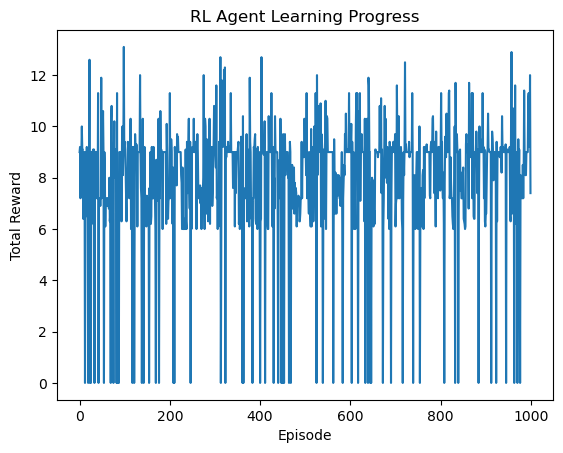

In [12]:
plt.plot(reward_list_limited)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('RL Agent Learning Progress')
plt.show()

In [13]:
# Create a DataFrame to store Q-values and the best action for each state
q_values_df = pd.DataFrame(columns=list(action_mapping.values()) + ['Best Action'])

# Loop through the dataset to compute Q-values for each state
for _, row in df.drop('Subscribed', axis=1).iterrows():
    state_values = np.array([row.values])
    q_values = q_network.predict(state_values)[0]
    best_action = action_mapping[np.argmax(q_values)]
    q_values_df.loc[len(q_values_df)] = list(q_values) + [best_action]


    
# Display the first few rows of the resulting DataFrame
q_values_df.head()

,make call,contact,demo,survey,assign manager,subscribe,do nothing,Best Action
0,11.123019,-24.104676,25.679833,-15.119797,76.434686,25.907434,15.150427,assign manager
1,2.451018,-7.493924,6.788505,-7.266729,24.196674,6.308204,3.144308,assign manager
2,10.766489,-24.079200,25.184868,-15.338470,75.930540,25.627684,14.980526,assign manager
3,3.663781,-12.736258,11.697888,-10.238373,39.058865,11.856398,6.001444,assign manager
4,8.651276,-24.855547,23.851402,-16.101218,74.043448,24.692265,13.863684,assign manager



#### Best Actions

Based on the Q-values made by the Reinforcment learning model. In general, the actions with the most values tend to be:

1. assigning a manager
2. offering a demo
3. Customer taking a survey
4. making a call with them.